In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [106]:
data = pd.read_csv('lottery_data.csv')

In [107]:
data

,date,weekday,winning_numbers,powerball,powerplay,jackpot
0,2014-05-07,Wed,17-29-31-48-49,34,2,70000000
1,2014-05-10,Sat,4-31-41-47-55,1,2,90000000
2,2014-05-14,Wed,7-33-39-52-55,33,3,90000000
3,2014-05-17,Sat,23-32-39-47-49,22,3,114000000
4,2014-05-21,Wed,4-20-34-39-58,31,5,114000000
...,...,...,...,...,...,...
945,2022-10-24,Mon,18-23-35-45-54,16,4,625000000
946,2022-10-26,Wed,19-36-37-46-56,24,2,700000000
947,2022-10-29,Sat,19-31-40-46-57,23,3,825000000
948,2022-10-31,Mon,13-19-36-39-59,13,3,1000000000


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             950 non-null    object
 1   weekday          950 non-null    object
 2   winning_numbers  950 non-null    object
 3   powerball        950 non-null    int64 
 4   powerplay        950 non-null    int64 
 5   jackpot          950 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 44.7+ KB


In [109]:
data.describe()

,powerball,powerplay,jackpot
count,950.000000,950.000000,9.500000e+02
mean,14.510526,2.694737,2.923004e+08
std,8.165142,1.142840,3.890469e+09
min,1.000000,0.000000,2.000000e+07
25%,8.000000,2.000000,7.000000e+07
50%,14.500000,2.000000,1.255000e+08
75%,21.000000,3.000000,2.215000e+08
max,35.000000,10.000000,1.200000e+11


In [110]:
data = pd.DataFrame(data,columns = ['powerplay','jackpot'])

In [111]:
data.head(10)

,powerplay,jackpot
0,2,70000000
1,2,90000000
2,3,90000000
3,3,114000000
4,5,114000000
5,2,132000000
6,3,152000000
7,2,192000000
8,3,192000000
9,2,227400000


In [112]:
df=data.head(10)

<AxesSubplot:xlabel='powerplay', ylabel='jackpot'>

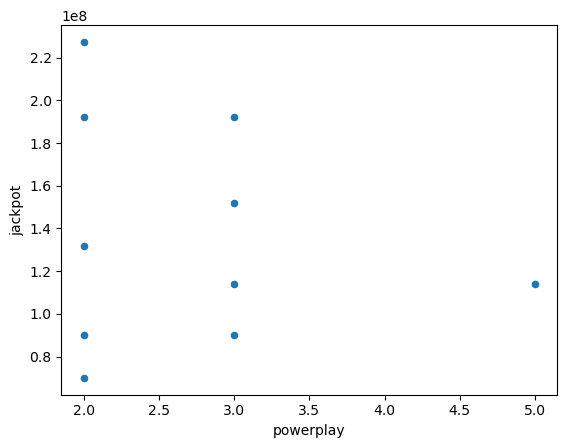

In [113]:
df.plot.scatter(x = 'powerplay', y = 'jackpot')

In [115]:
X = data[['powerplay']]

In [116]:
X.head(10)

,powerplay
0,2
1,2
2,3
3,3
4,5
5,2
6,3
7,2
8,3
9,2


In [117]:
Y = data[['jackpot']]

In [118]:
Y.head(10)

,jackpot
0,70000000
1,90000000
2,90000000
3,114000000
4,114000000
5,132000000
6,152000000
7,192000000
8,192000000
9,227400000


In [119]:
from sklearn.model_selection import train_test_split

In [120]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size = 0.2,random_state = 0)

In [134]:
xtrain.head(10)

,powerplay
62,2
79,5
647,2
181,4
304,2
732,2
921,3
941,5
308,3
665,4


In [135]:
xtest.head(10)

,powerplay
872,2
568,2
249,2
331,2
492,3
692,3
820,2
724,2
14,4
31,3


In [136]:
ytrain.head(10)

,jackpot
62,60000000
79,450000000
647,97000000
181,96000000
304,40000000
732,168000000
921,124000000
941,454000000
308,80000000
665,20000000


In [137]:
ytest.head(10)

,jackpot
872,51000000
568,100000000
249,50000000
331,140000000
492,144000000
692,321000000
820,630000000
724,67000000
14,70000000
31,70000000


In [125]:
from sklearn.linear_model import LinearRegression

In [96]:
lm = LinearRegression()

In [126]:
lm.fit(xtrain,ytrain)

LinearRegression()

In [127]:
predictions = lm.predict(xtest)

In [138]:
predictions.head(10)

,predictions
0,3.856581e+08
1,3.856581e+08
2,3.856581e+08
3,3.856581e+08
4,2.954094e+08
5,2.954094e+08
6,3.856581e+08
7,3.856581e+08
8,2.051606e+08
9,2.954094e+08


In [129]:
predictions = pd.DataFrame(predictions,columns = ['predictions'])

In [139]:
predictions.head(10)

,predictions
0,3.856581e+08
1,3.856581e+08
2,3.856581e+08
3,3.856581e+08
4,2.954094e+08
5,2.954094e+08
6,3.856581e+08
7,3.856581e+08
8,2.051606e+08
9,2.954094e+08


<AxesSubplot:xlabel='powerplay', ylabel='jackpot'>

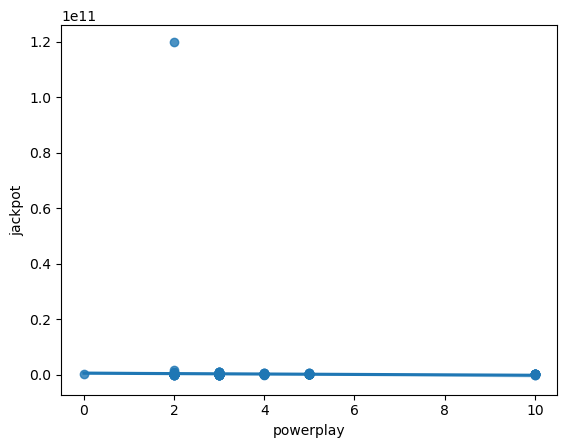

In [144]:
sns.regplot(x = 'powerplay', y = 'jackpot', data = data, fit_reg = True)